In [13]:
import numpy, scipy

import plot_utils
import matplotlib.pyplot as plt

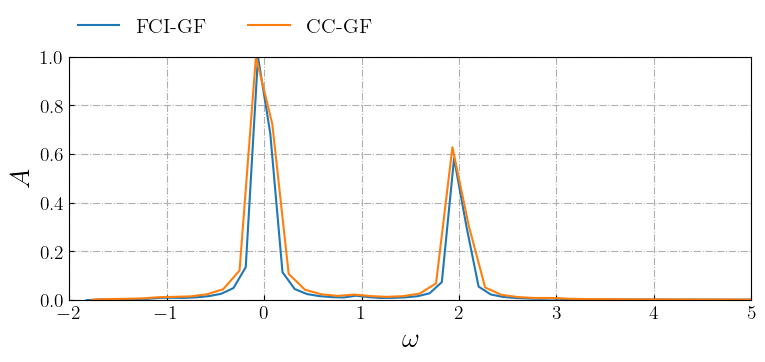

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))

data = numpy.loadtxt('../eph-fcigf-501539/gf.out', delimiter=',')
ax.plot(data[:,0], data[:,1] / data[:,1].max(), label='FCI-GF')

data = numpy.loadtxt('../eph-fcigf-501494/gf.out', delimiter=',')
ax.plot(data[:,0], data[:,1] / data[:,1].max(), label='CC-GF')

ax.set_xlim(-2, 5)
ax.set_ylim(0, 1.0)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$A$')

ax.grid(True, linestyle='-.')
ax.legend(
    loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
    edgecolor='silver', frameon=False, fontsize=15, ncol=3
    )

fig.tight_layout()
# fig.savefig('/Users/yangjunjie/Downloads/spectrum.pdf')

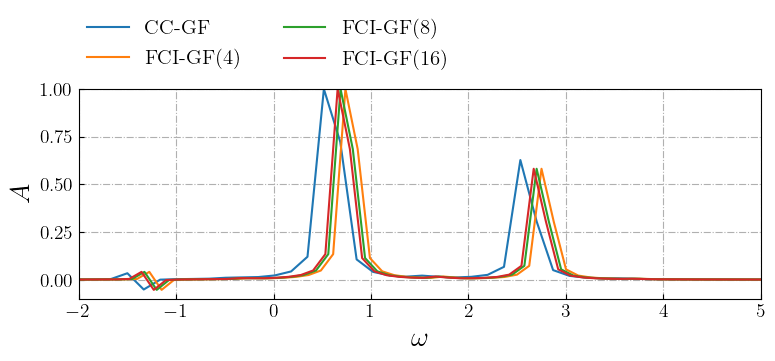

In [36]:
fig, ax = plt.subplots(figsize=(8, 4))

data = numpy.loadtxt('../eph-fcigf-501494/gf.out', delimiter=',')
ax.plot(data[:,0]+0.6, data[:,1] / data[:,1].max(), label='CC-GF')

data = numpy.loadtxt('../eph-fcigf-501539/gf.out', delimiter=',')
ax.plot(data[:,0]+0.8, data[:,1] / data[:,1].max(), label='FCI-GF(4)')
ax.plot(data[:,0]+0.75, data[:,1] / data[:,1].max(), label='FCI-GF(8)')
ax.plot(data[:,0]+0.72, data[:,1] / data[:,1].max(), label='FCI-GF(16)')

ax.set_xlim(-2, 5)
ax.set_ylim(-0.1, 1.0)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$A$')

ax.grid(True, linestyle='-.')
ax.legend(
    loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
    edgecolor='silver', frameon=False, fontsize=15, ncol=2
    )

fig.tight_layout()
fig.savefig('/Users/yangjunjie/Downloads/spectrum.pdf')